# 6.0002 Lecture 11: Introduction to Machine Learning

**Speaker:** Prof. Eric Grimson

## The plan ahead
- machine learning is a huge topic -- whole courses devoted to it
    - e.g., 6.008, 6.036, 6.860, 6.862, 6.867
    - is central part of courses in natural language processing, computational biology, computer vision, robotics, other area
- in 6.0002, we will
    - provide an introduction to the basic ideas, including ways to measure distances between examples, and how to group examples based on distance to create models
    - introduce classification methods, such as "k nearest neighbor" methods
    - introduce clustering methods, such as "k-means"

## What is machine learning
- all useful programs "learn" something
- in the first lecture of 6.0001 we looked at an algorithm for finding square roots
- last week we looked at using linear regression to find a model of a collection of points
- early definition of machine learning:
    - "*Field of study that gives computers the ability to learn without being explicitly programmed."* -- Arthur Samuel (1959)
        - computer pioneer who wrote first self-learning program, which played checkers -- learned from "experience"
        - invented alpha-beta pruning -- widely used in decision tree searching
- traditional programming
    - data, program --> computer --> output (e.g. square root finder)
- machine learning
    - data, output --> computer --> program (e.g. curve fitting by linear regression)

## How are things learned?
- memorization
    - accumulation of individual facts
    - limited by
        - time to observe facts
        - memory to store facts
    - this is **declaritive knowledge**
- generalization
    - deduce new facts from old facts
    - limited by accuracy of deduction process
        - essentially a predictive activity
        - assumes that the past predicts the future
- interested in extending to programs that can infer useful information from **implicit** patterns in data

## Basic paradigm
- observe set of examples: **training data**
    - e.g. spatial deviations to mass displacements of spring
    - e.g. football players, labeled by position, with height and weight data
- infer something about process that generated that data
    - e.g. fit polynomial curve using linear regression
    - e.g. find canonical model of position, by statistics
- use inference to make predictions about previously unseen data: **test data**
    - e.g. predict displacements for other weights
    - e.g. predict position of new players
- variations on paradigm
    - **supervised learning**: given a set of feature/label pairs, find a rule that predicts the label associated with a previously unseen input
    - **unsupervised learning**: given a set of feature vectors (without labels) group them into "natural clusters" (or create labels for groups)

## Clustering examples into groups
- want to decide on "similarity" of examples, with goal of separating into distinct, "natural" groups
    - similarity is a **distance measure**
- suppose we know that there are k different groups in our training data, but don't know labels
    - pick k samples (at random?) as exemplars
    - cluster remaining samples by minimizing distance between samples in same cluster (**objective function**) -- put sample in a group with closest exemplar
    - find median exampe in each cluster as new exemplar
    - repeat until no change

## Finding classifier surfaces
- suppose data is labeled
- given labeled groups in feature space, want to find subsurface in that space that separates the groups
    - subject to constraints on complexity of subsurface
- in this example, have 2D space, so find line (or connected set of line segments) that best separates the two groups
- when examples well separated, this is straightforward
- when examples in labeled groups overlap, may have to trade off false positives and false negatives


## Machine learning methods
- we will see some examples of machine learning methods:
- learn models based on unlabeled data, by clustering training data into groups of nearby points
    - resulting clusters can assign labels to new data
- lean models that separate labeled groups of similar data from other groups
    - may not be possible to perfectly separate groups without "overfitting"
    - but can make decisions with respect to trading off "false positives" versus "false negatives"
    - resulting classifiers can assign labels to new data

## All ML methods require:
- choosing traning data and evaluation method
- representation of features
- distance metric for feature vectors
- objective function and constraints
- optimization methof for learning the model

## Feature representation
- features never fully describe the situation
    - "All models are wrong, but some are useful." -- George Box
- **feature engineering**
    - represent examples by feature vectors that will facilitate generalization
    - suppose I want to use 100 examples from the past to predict, at the start of the subject, which students will get an A in 6.0002
    - some features surely helpful, e.g., GPA, prior programming experience (not a perfect predictor)
    - others might cause overfitting, e.g., birth month, eye color
- want to maximize ratio of useful input to irrelevant input
    - signal-to-noise ratio (SNR)

## Need to measure distances between features
- feature engineering:
    - deciding which features to include and which are merely adding noise to classifier
    - defining how to measure distances between training examples (and ultimately between classifiers and new instances)
    - deciding how to weight relative importance of different dimensions of feature vector, which impacts definition of distance

## Measuring distance between animals
- we can think of our animal examples as consisting of four binary features and one integer feature
- one way to learn to separate reptiles from non-reptiles is to measure distance between pairs of examples, and use that:
    - to cluster nearby examples into a common class (unlabeled data), or
    - to find a classifier surface in a space of examples that optimally separates different (labeled) collections of examples from other collections
- can convert examples into feature vectors:
    - rattlesnake = [1, 1, 1, 1, 0]
    - boa constictor = [0, 1, 0, 1, 0]
    - dart frog = [1, 0, 1, 0, 4]

## Minkowski metric
- to measure distances between feature vectors:
$$\textrm{dist}(X1, X2, p) = \left(\sum_{k=1}^{\textrm{len}}|X1_k - X2_k|^p\right)^{\frac{1}{p}}$$
- $p=1$: Manhattan distance
    - called as such because you can only walk on the straight lines (blocks) in NYC
- $p=2$: Euclidean distance
- typically use Euclidean metric; Manhattan metric may be more appropriate if different dimensions are not comparable

In [1]:
def minkowskiDist(v1, v2, p):
    """Assumes v1 and v2 are equal-length arrays of numbers
       Returns Minkowski distance of order p between v1 and v2"""
    dist = 0.0
    for i in range(len(v1)):
        dist += abs(v1[i] - v2[i])**p
    return dist**(1.0/p)

## Code to Compare animals

In [2]:
import pylab

# animal class
class Animal(object):
    def __init__(self, name, features):
        """Assumes name a string; features a list of numbers"""
        self.name = name
        self.features = pylab.array(features)
        
    def getName(self):
        return self.name
    
    def getFeatures(self):
        return self.features
    
    def distance(self, other):
        """Assumes other an Animal
           Returns the Euclidean distance between feature vectors
              of self and other"""
        return minkowskiDist(self.getFeatures(),
                             other.getFeatures(), 2)

In [3]:
# function to comapre animals
def compareAnimals(animals, precision):
    """Assumes animals is a list of animals, precision an int >= 0
       Builds a table of Euclidean distance between each animal"""
    #Get labels for columns and rows
    columnLabels = []
    for a in animals:
        columnLabels.append(a.getName())
    rowLabels = columnLabels[:]
    tableVals = []
    #Get distances between pairs of animals
    #For each row
    for a1 in animals:
        row = []
        #For each column
        for a2 in animals:
            if a1 == a2:
                row.append('--')
            else:
                distance = a1.distance(a2)
                row.append(str(round(distance, precision)))
        tableVals.append(row)
    #Produce table
    table = pylab.table(rowLabels = rowLabels,
                        colLabels = columnLabels,
                        cellText = tableVals,
                        cellLoc = 'center',
                        loc = 'center',
                        colWidths = [0.2]*len(animals))
    table.scale(1, 2.5)
    pylab.title('Euclidean Distance Between Animals')

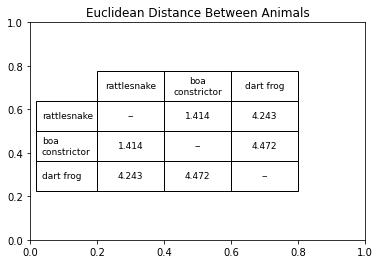

In [4]:
rattlesnake = Animal('rattlesnake', [1,1,1,1,0])
boa = Animal('boa\nconstrictor', [0,1,0,1,0])
dartFrog = Animal('dart frog', [1,0,1,0,4])
animals = [rattlesnake, boa, dartFrog]
compareAnimals(animals, 3)

## Add an alligator

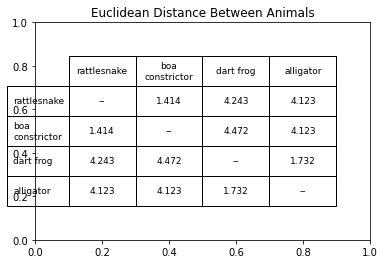

In [5]:
alligator = Animal('alligator', [1,1,0,1,4])
animals.append(alligator)
compareAnimals(animals, 3)

- alligator is closer to dart frog than to snakes-- why?
    - alligator differs from frog in 3 features, from boa in only 2 features
    - but scale on "legs" is from 0 to 4, on other features is 0 to 1
    - "legs" dimension is disproportionately large

## Using binary features

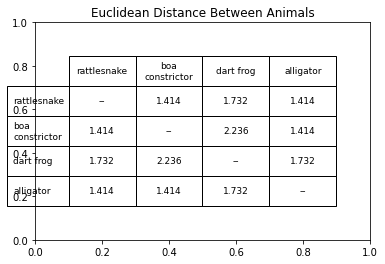

In [6]:
rattlesnake = Animal('rattlesnake', [1,1,1,1,0])
boa = Animal('boa\nconstrictor', [0,1,0,1,0])
dartFrog = Animal('dart frog', [1,0,1,0,1])
alligator = Animal('alligator', [1,1,0,1,1])
animals = [rattlesnake, boa, dartFrog, alligator]
compareAnimals(animals, 3)

- animals represented with binary features:
    - rattlesnake = [1, 1, 1, 1, 0]
    - boa constrictor = [0, 1, 0, 1, 0]
    - dart frog = [1, 0, 1, 0, 1]
    - alligator = [1, 1, 0, 1, 1]
- now alligator is closer to snakes than it is to dart frog -- makes more sense
- **feature engineering matters!**

## Supervised versus unsupervised learning
- in the next few lectures, we will see examples of earning algorithms:
- when given unlabeled data, try to find clusters of examples near each other
    - use centroids of clusters as definition of each learned class
    - new data assigned to closest cluster
- when given labeled data, learn mathematical surface that "best" separates labeled examples, subject to constraints on complexity of surface (don't overfit)
    - new data assigned to class based on portion of feature space carved out by classifier surface in which it lies

## Issue of concern when learning models
- learned models will depend on:
    - distance metric between examples
    - choice of feature vectors
    - constraints on complexity of model
        - specified number of clusters
        - complexity of separating surface
        - want to avoid overfitting problem (each example is its own cluster, or a complex separating surface)

## Clustering approaches
- suppose we know that there are k different groups in out training data, but don't know labels
    - pick k samples (at random?) as exemplars
    - cluster remaining samples by minimizing distance between samples in same cluster (**objective function**)-- put sample in group with closest exemplar
    - find median example in each cluster as new exemplar
    - repeat until no change
- issues:
    - how do we decide on the best number of clusters?
    - how do we select the best features and the best distance metric?

## Classification approaches
- want to find boundaries in feature space that separate different classes of labeled examples
    - look for simple surface (e.g. best line or plane) that separates classes
    - look for more complex surfaces (subject to constraints) that separates classes
    - use voting schemes
        - find k nearest training examples, use majority vote to select label
- issues:
    - how do we avoid over-fitting to data?
    - how do we measure performance?
    - how do we select best features?

## Classification
- attempt to minimize error on training data
    - similar to fitting a curve to data
- evaluate on training data

## Confusion Matrices (training error)
- 4x4 table, rows are the actual classification (pos or neg), colums are the predicted classification (pos or negative)
    - so upper right corner are false negatives, lower left corner are false positives


## Training accuracy of models
$$\textrm{accuracy} = \frac{\textrm{true positive} + \textrm{true negative}}{\textrm{true positive} + \textrm{true negative} + \textrm{false positive} + \textrm{false negative}}$$

## Other statistical measures
- you will also see "sensitivity" versus "specificity"
- sensitivity: percentage correctly found
$$\textrm{sensitivity} = \frac{\textrm{true positive}}{\textrm{true positive} + \textrm{true positive} + \textrm{false negative}}$$
- specificity: percentage correctly rejected
$$\textrm{specificity} = \frac{\textrm{true negative}}{\textrm{true negative} + \textrm{false positive}}$$

## Summary
- machine learning methods provide a way of building models of processes from data sets
    - supervised learning uses labeled data, and creates classifiers that optimally separate data into known classes
    - unsupervised learning tries to infer latent variables by clustering training examples into nearby groups
- choice of features influences results
- choice of distance measurement between examples influences results
- we will see some examples of clustering methods, such as k-means
- we will see some examples of classifiers such as k nearest neighbor methods